In [1]:
import sys
sys.path.append('..')

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import matplotlib.pylab as plt
import pandas as pd
from tqdm import tqdm
from IPython import display
import seaborn as sns
import warnings
from src.visualization import draw_mlp_clustering_report, run_double_spectral_cluster
from src.utils import build_clustering_results, suppress, all_logging_disabled
from src.experiment_tagging import get_model_path, MODEL_TAG_LOOKUP
from src.spectral_cluster_model import SHUFFLE_METHODS
from src.lesion import (perform_lesion_experiment, do_lesion_hypo_tests,
                        plot_all_damaged_clusters, compute_damaged_cluster_stats,
                        plot_overall_damaged_clusters)
from src.pointers import DATA_PATHS

sns.set(style='whitegrid')

Using TensorFlow backend.


In [2]:
model_tags = ['CNN-CIFAR10-FULL', 'CNN-CIFAR10-FULL+DROPOUT']
model_paths = [get_model_path(mt) for mt in model_tags]
dataset = 'cifar10_full'
n_clust = 10
n_samples = 100
n_shuffles = 20
n_workers = 10

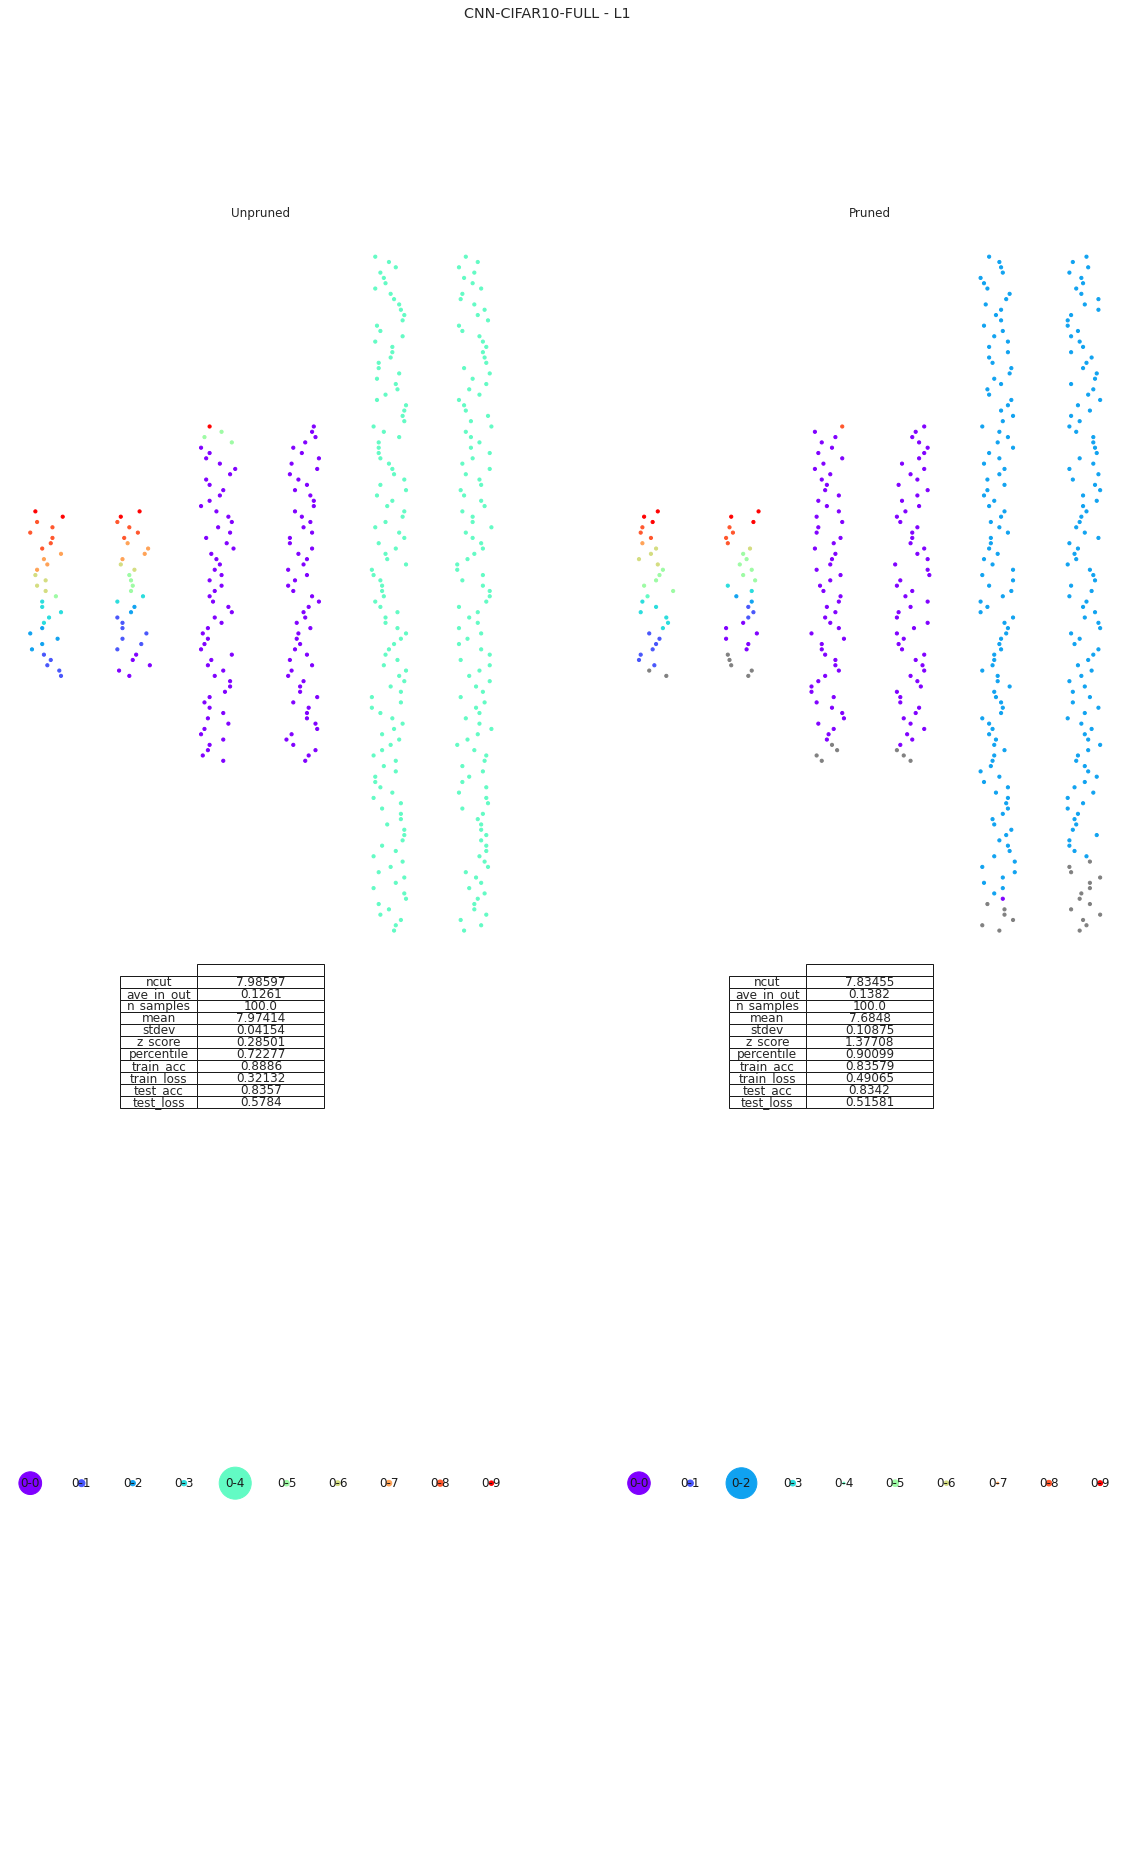

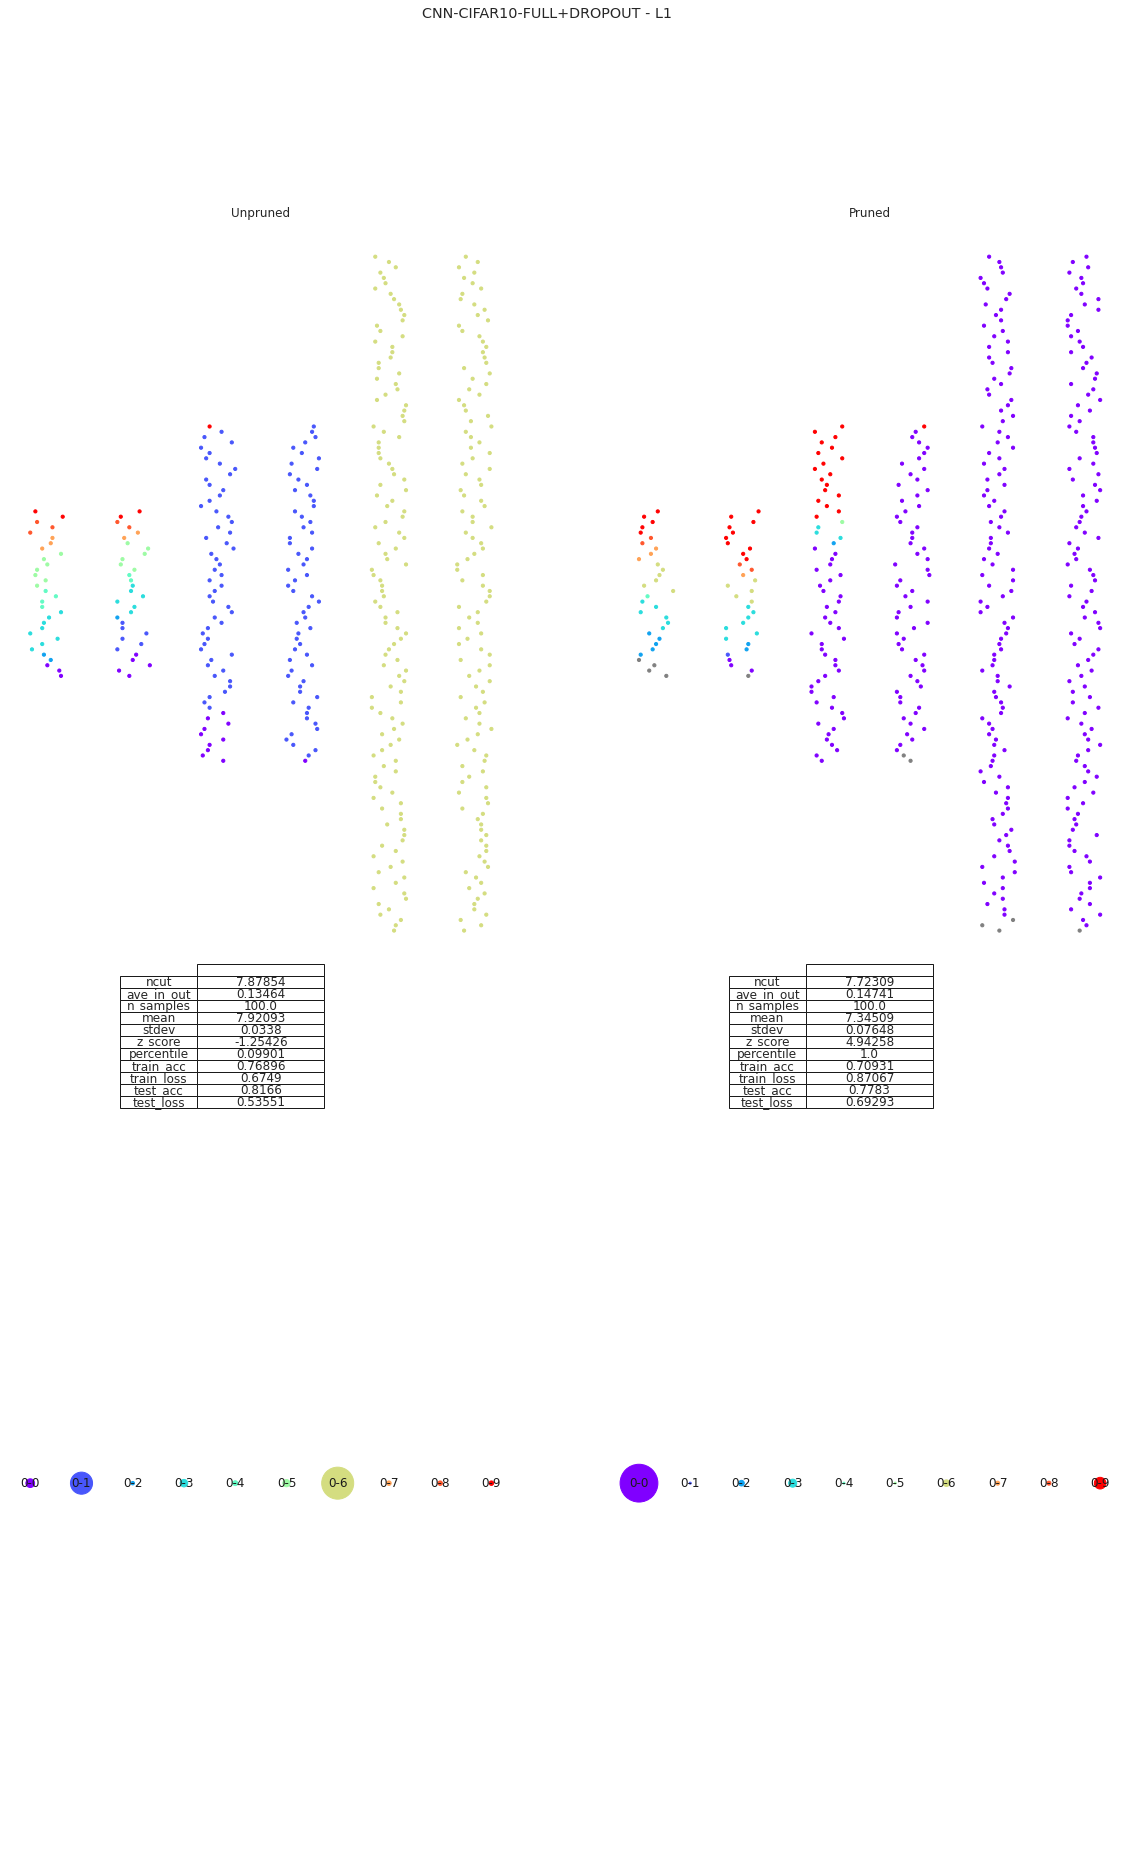

In [3]:
for tag, path in zip(model_tags, model_paths):

    clustering_results_l1 = run_double_spectral_cluster(path, n_clusters=n_clust,
                                                        n_samples=n_samples, n_workers=n_workers)
    draw_mlp_clustering_report(path, clustering_results_l1,
                               n_cluster=n_clust, title=f'{tag} - L1')

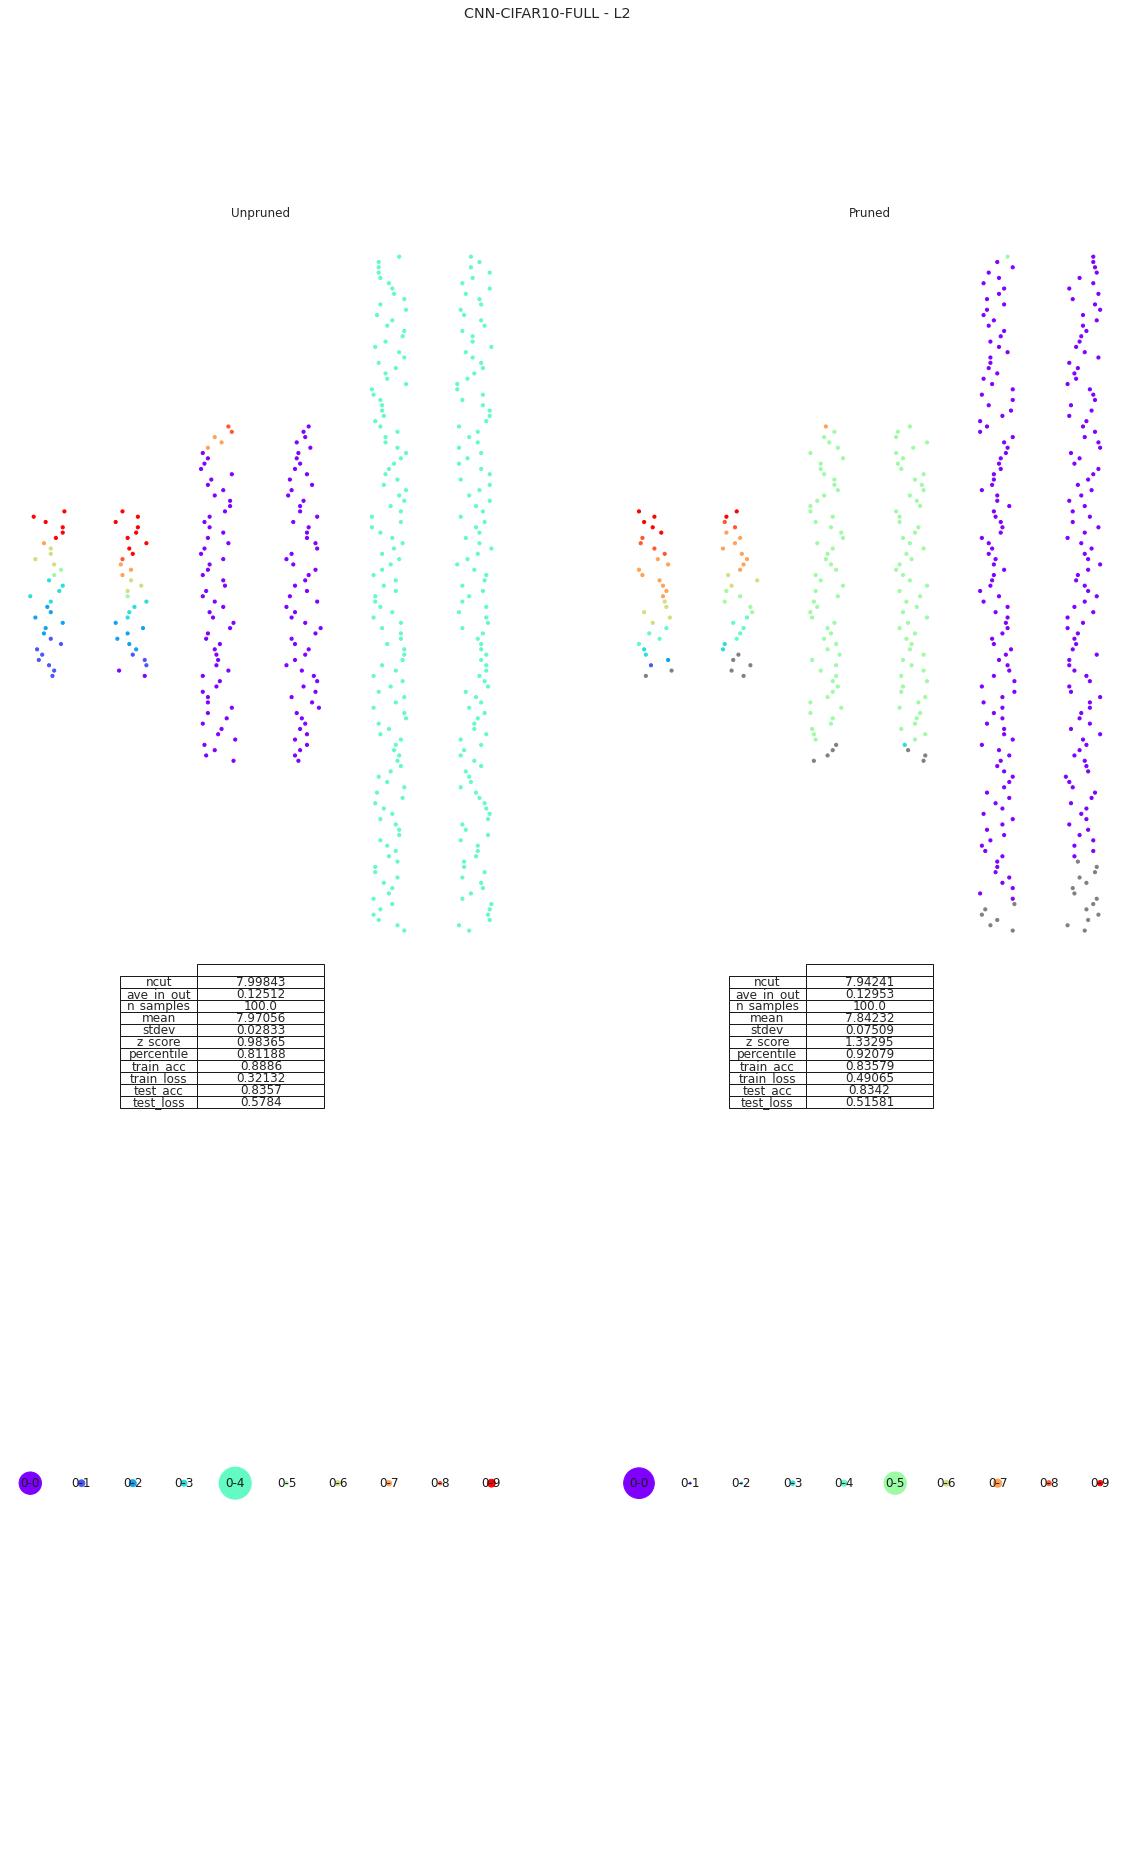

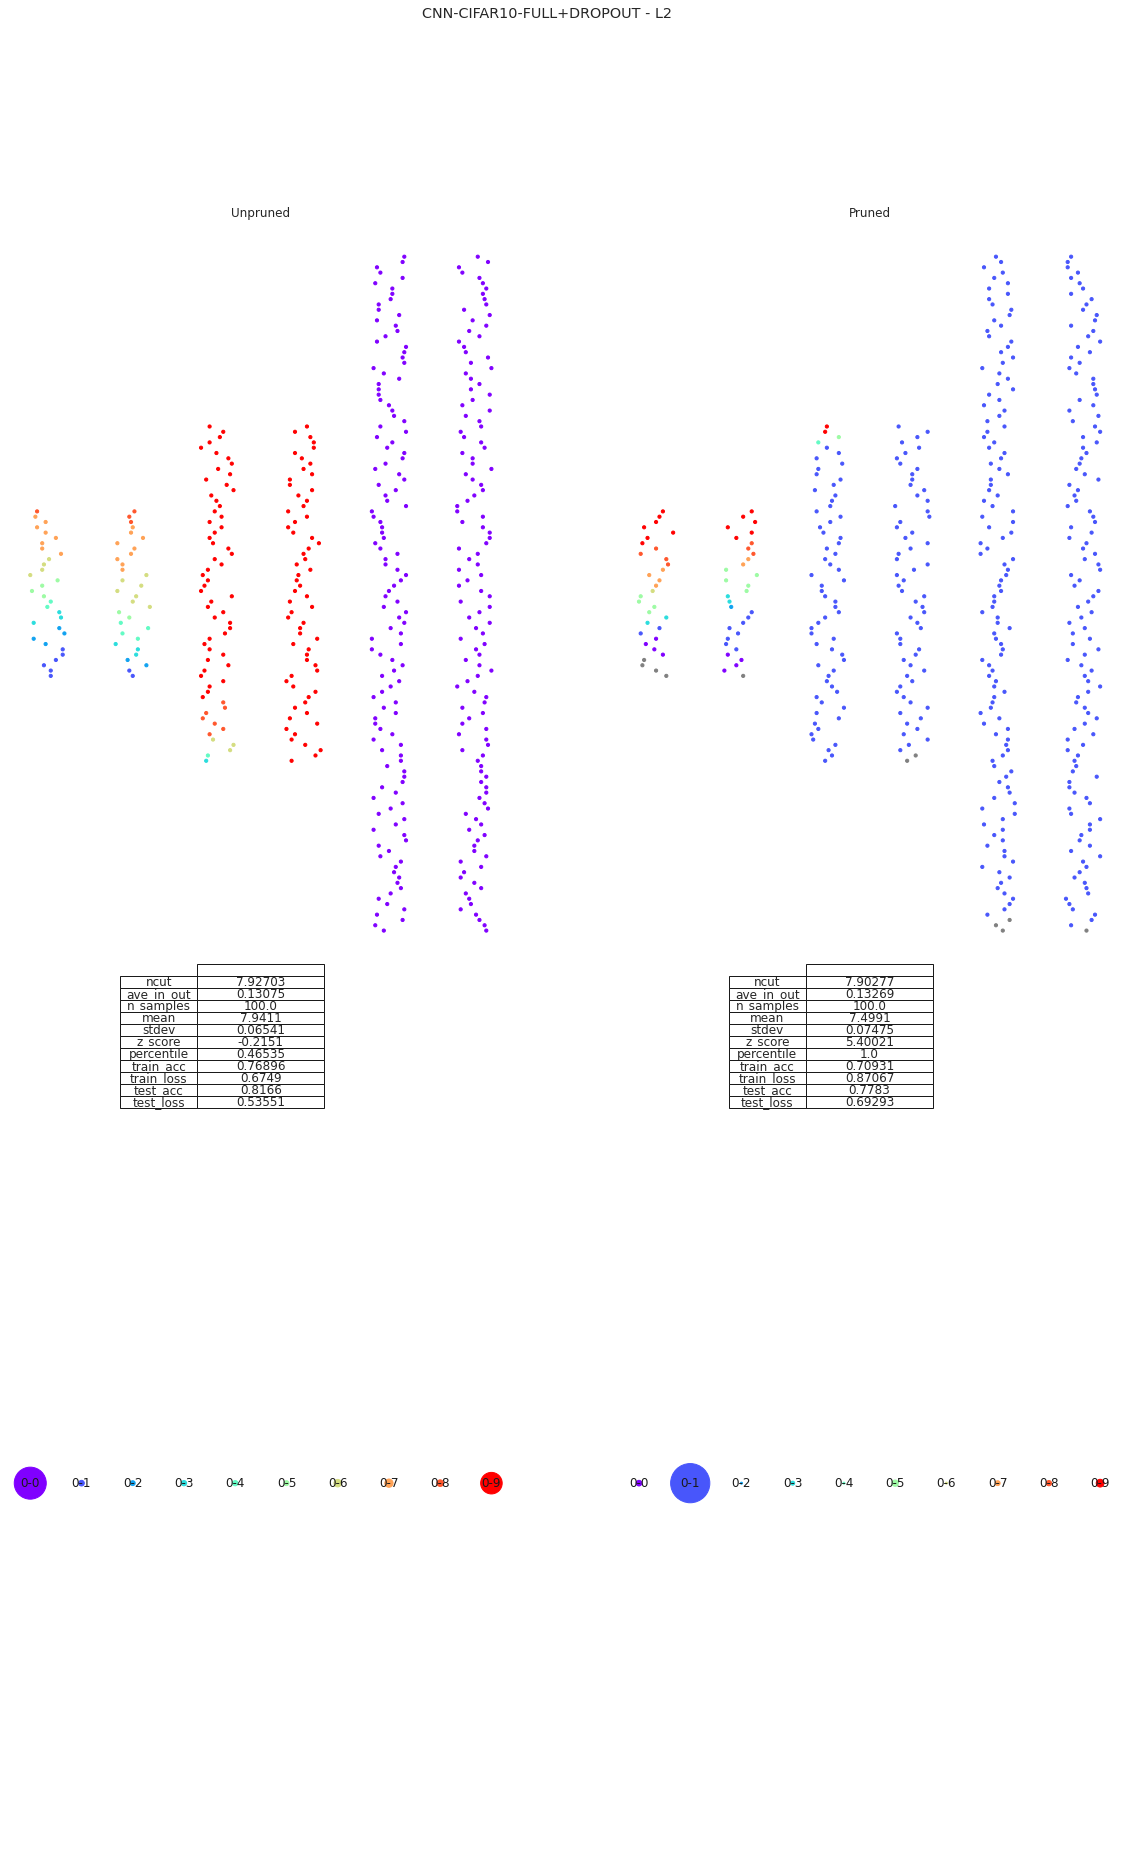

In [4]:
for tag, path in zip(model_tags, model_paths):

    clustering_results_l2 = run_double_spectral_cluster(path, n_clusters=n_clust, n_samples=n_samples,
                                                        n_workers=n_workers, filter_norm=2)
    draw_mlp_clustering_report(path, clustering_results_l2, filter_norm=2,
                               n_cluster=n_clust, title=f'{tag} - L2')

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    for tag, path in zip(model_tags, model_paths):

        (true_results, all_random_results, metadata, evaluation) = perform_lesion_experiment('.' + DATA_PATHS[dataset],
                                                         path, n_side=32, depth=3, n_clusters=n_clust, n_shuffles=n_shuffles)

        plot_all_damaged_clusters(true_results, all_random_results, metadata, evaluation, title=f'{tag}')

        plot_overall_damaged_clusters(true_results, all_random_results, metadata, evaluation, title=f'{tag}')

        hypo_results = do_lesion_hypo_tests(true_results, all_random_results)
        mean_percentiles = hypo_results['mean_percentiles']
        range_percentiles = hypo_results['range_percentiles']
        chi2_p_means = hypo_results['chi2_p_means']
        chi2_p_ranges = hypo_results['chi2_p_ranges']
        combined_p_means = hypo_results['combined_p_means']
        combined_p_ranges = hypo_results['combined_p_ranges']
        print(tag)
        print(f'Mean percentiles: {mean_percentiles}')
        print(f'Range percentiles: {range_percentiles}')
        print(f'chi2 mean p: {chi2_p_means}')
        print(f'chi2 range p: {chi2_p_ranges}')
        print(f'combined mean p: {combined_p_means}')
        print(f'combined range p: {combined_p_ranges}')
        print()